In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
from  feature_engine.outliers import Winsorizer

#for train and test data set
from sklearn.model_selection import train_test_split

#cross velidation
from sklearn.model_selection import cross_val_score

C:\Users\mralo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv("Advertising.csv")
print(df.tail())
df.head()

         TV  radio  newspaper  sales
195   38200   3700      13800   7600
196   94200   4900       8100   9700
197  177000   9300       6400  12800
198  283600  42000      66200  25500
199  232100   8600       8700  13400


,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


In [7]:
#add a new column in this data set
df['total_spend']=df['TV']+df["radio"]+df['newspaper']


In [8]:
df

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000
...,...,...,...,...,...
195,38200,3700,13800,7600,55700
196,94200,4900,8100,9700,107200
197,177000,9300,6400,12800,192700
198,283600,42000,66200,25500,391800


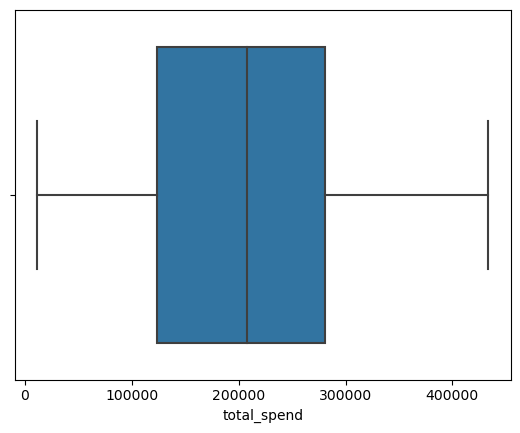

In [9]:
sns.boxplot(x=df['total_spend'])
plt.show()

no outlayers

In [10]:
df.drop(columns=["TV",'radio','newspaper'],inplace=True)

C:\Users\mralo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mralo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mralo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


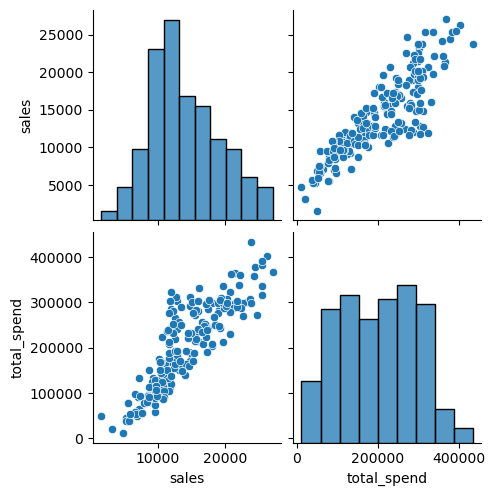

In [11]:
sns.pairplot(df)
plt.show()

in this sctar plot we see it is a linner regresion

In [12]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


###### 86% corelation

in this data no categoriacl data so no need to data wangling

# Train-Test Split

In [13]:
X=df.drop(columns='total_spend')
y=df['total_spend']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [15]:
#import
from sklearn.linear_model import LinearRegression

#save the model 
model=LinearRegression()
#fit
model.fit(X_train, y_train)


LinearRegression()

In [16]:
model.intercept_#intrecept  (b0)

-8904.872408692841

In [17]:
model.coef_#(b1)

array([15.12484339])

b1 and b0 only for linear regresion

In [18]:
train_predict=model.predict(X_train)

In [19]:
test_predict= model.predict(X_test)


In [20]:
from sklearn.metrics import mean_absolute_error
print('mse for test :', mean_absolute_error(y_test, test_predict))
print('mse for train :', mean_absolute_error(y_train, train_predict))

mse for test : 38658.26454263876
mse for train : 35832.59480093471


In [21]:
from sklearn.metrics import mean_squared_error
print('mse for test :', mean_squared_error(y_test, test_predict))
print('mse for train :', mean_squared_error(y_train, train_predict))

mse for test : 2203108312.3662252
mse for train : 2104537771.9966726


In [22]:
from sklearn.metrics import r2_score
print("R2 for test data :", r2_score(y_test,test_predict))
print("R2 for train data :", r2_score(y_test,test_predict))

R2 for test data : 0.756754451698265
R2 for train data : 0.756754451698265


In [23]:
model.score(X_test,y_test)

0.756754451698265

In [24]:
model.score(X_train,y_train)

0.7404192834391546

here train r2 = 74% and test r2= 76% both are closer each other so its a good model +-5%

# cross velidation

In [25]:
scores=cross_val_score(model,X,y,cv=5)
print(scores)

cv_score =scores.mean()
print("cross validation Score",cv_score)


#if test accuresi and cross validetionis (+-5%) thn  its ok

[0.74889528 0.81411823 0.76073463 0.7449477  0.66862442]
cross validation Score 0.7474640514827872


linearity of errors

In [26]:
test_res = y_test - test_predict
test_res

95       1095.019177
15     -33891.619449
30      49633.223938
158     -7706.484313
128    -92178.759238
115    -18868.154261
69     -40479.135110
170    -38143.812038
174     73869.173464
45      12644.705950
66     -76481.139763
182    -31081.265054
165    151619.236109
78     -26556.797540
186     21318.985528
177     45144.204787
56       2518.233783
152     -7067.527807
82     -33905.857859
68      -1054.667596
124     46945.457695
16      38244.330078
148    -65755.920504
93      32833.349229
65     -52556.171086
60     -36706.359022
84     -29004.229078
67     -29768.028970
125    -26518.467488
132    -39606.734894
9       72181.532512
18     -54005.857859
55     -41253.915851
75      27318.734946
150     96994.893886
104    -26379.385692
135    -62743.310875
137     56608.129970
164    -33780.763891
76     -45656.546958
79     -10668.404843
197      8006.877062
38     -38956.045795
24     -44606.108440
122     75456.689125
195    -50343.937329
29     -22505.983149
19     -21617

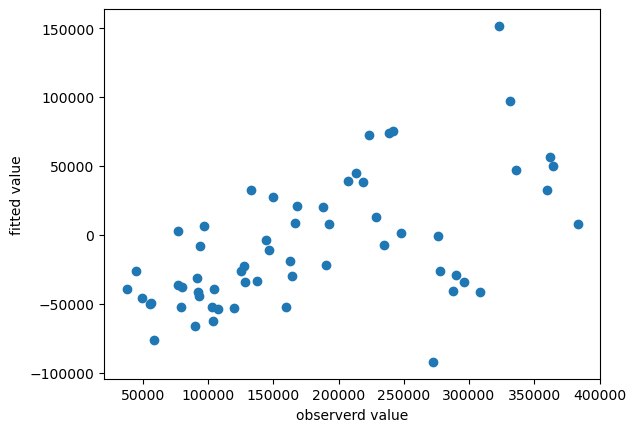

In [27]:
plt.scatter(y_test,test_res)
plt.xlabel("observerd value")
plt.ylabel("fitted value")
plt.show()

C:\Users\mralo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mralo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


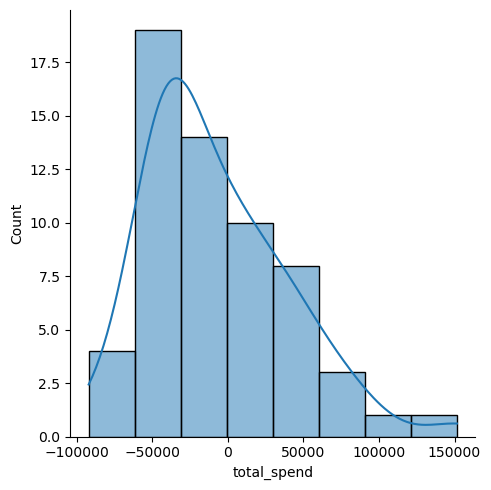

In [28]:
sns.displot(test_res,kde=True)
plt.show()

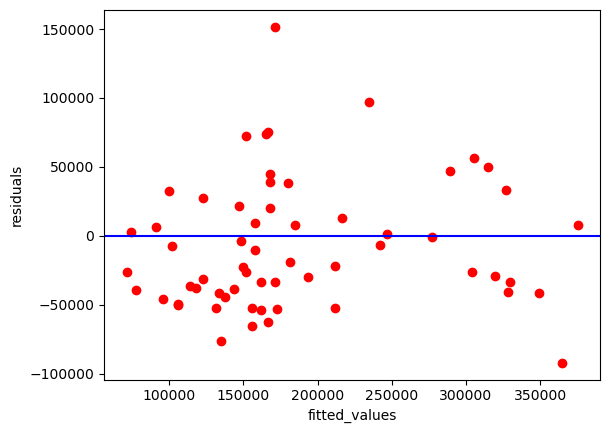

In [29]:
plt.scatter(test_predict,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [30]:
import statsmodels.formula.api as smf
model2=smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Fri, 24 May 2024   Prob (F-statistic):           5.06e-62
Time:                        08:46:20   Log-Likelihood:                -2431.5
No. Observations:                 200   AIC:                             4867.
Df Residuals:                     198   BIC:                             4874.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.599e+04   9416.419     -1.698      0.091   -3.46e+04    2581.504
X             15.4643      0.630     24.564      0.000      14.223      16.706
==============================================================================
Omnibus:                       24.691   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.737
Skew:                           0.904   Prob(JB):                     3.49e-07
Kurtosis:                       3.544   Cond. No.                     4.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
model.predict([[321400]])

C:\Users\mralo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4852219.7920087])

In [32]:
#save model
from joblib import dump

dump(model,'sales_model.joblib')


['sales_model.joblib']

In [37]:
#its  for clint use  

from joblib import load
loaded_model = load("sales_model.joblib")
loaded_model.predict([[10400]])

C:\Users\mralo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([148393.49881079])

In [34]:
df

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000
...,...,...
195,7600,55700
196,9700,107200
197,12800,192700
198,25500,391800
